# Lezione 10: La Prova - Come una Rete Fa una Previsione ⛓️

Nella lezione precedente abbiamo analizzato un singolo neurone. Ora, colleghiamo questi neuroni insieme per formare una piccola "catena di montaggio".

Il processo con cui i dati attraversano questa catena, dall'inizio alla fine, per produrre un risultato si chiama **Propagazione in Avanti (Forward Propagation)**.

**L'idea è semplice:**
1.  Lo strato di input riceve i dati.
2.  Passa i suoi risultati al primo strato nascosto.
3.  Il primo strato nascosto fa i suoi calcoli e passa i risultati al secondo strato nascosto (se esiste).
4.  ...e così via, fino a quando l'ultimo strato (lo strato di output) produce la previsione finale della rete.

All'inizio, i pesi e i bias della rete sono **casuali**. Questo significa che la sua prima previsione sarà quasi sicuramente **sbagliata**. La cosa importante, che vedremo oggi, è **misurare esattamente *quanto* è sbagliata**.

Per i nostri calcoli, useremo una rete neurale giocattolo semplicissima:
* **1 neurone di input**: Riceve un solo dato, `x`.
* **1 strato nascosto con 2 neuroni**: Chiamiamoli `N_h1` e `N_h2`.
* **1 neurone di output**: Produce il risultato finale, `y_predetto`.

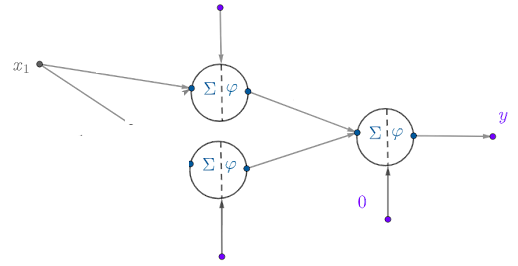

**PESI E BIAS PREDEFINITI** (di solito sono casuali, ma li fissiamo per poter fare i calcoli insieme):
* **Dal neurone di input a quelli nascosti:**
    * `w1` (verso `N_h1`) = **0.8**
    * `w2` (verso `N_h2`) = **0.2**
* **Dallo strato nascosto a quello di output:**
    * `w3` (da `N_h1`) = **0.3**
    * `w4` (da `N_h2`) = **0.9**
* **Bias:**
    * `b1` (per `N_h1`) = **0.0**
    * `b2` (per `N_h2`) = **0.0**
    * `b_out` (per il neurone di output) = **0.0**
    *(Per semplicità, teniamo tutti i bias a zero in questo esempio).*

**FUNZIONE DI ATTIVAZIONE:** Useremo una funzione molto comune chiamata **Sigmoide**. È simile alla funzione a gradino, ma invece di dare solo 0 o 1, produce un valore "morbido" tra 0 e 1. Non ci serve la sua formula, basta sapere che la applicheremo al risultato di ogni neurone.

In [1]:
# --- DATI PER LA NOSTRA PROVA ---
# Immaginiamo di voler predire se uno studente passerà un esame (1=Sì, 0=No)
# basandoci su un punteggio di preparazione da 0 a 1.
#
# Il nostro studente ha un punteggio di preparazione di 0.9.
x = 0.9
# La risposta corretta (l'etichetta) è 1 (lo studente ha passato l'esame).
y_reale = 1

# --- DEFINIZIONE DELLA FUNZIONE SIGMOIDE (per riferimento) ---
# Questa è la matematica dietro la funzione, ma non è necessario impararla a memoria.
# La useremo solo per ottenere i risultati dei calcoli.
import numpy as np
def sigmoide(valore):
  return 1 / (1 + np.exp(-valore))

# --- PASSO 1: Calcoliamo l'output dello strato nascosto ---

# Neurone N_h1:
somma_h1 = (x * 0.8) + 0.0  # (input * w1) + b1
output_h1 = sigmoide(somma_h1) # Applichiamo l'attivazione
# Calcolo: sigmoide(0.9 * 0.8) = sigmoide(0.72) = 0.672

# Neurone N_h2:
somma_h2 = (x * 0.2) + 0.0  # (input * w2) + b2
output_h2 = sigmoide(somma_h2) # Applichiamo l'attivazione
# Calcolo: sigmoide(0.9 * 0.2) = sigmoide(0.18) = 0.545

print(f"Output del neurone nascosto 1 (N_h1): {output_h1:.3f}")
print(f"Output del neurone nascosto 2 (N_h2): {output_h2:.3f}")


# --- PASSO 2: Calcoliamo l'output finale della rete ---
# L'input del neurone di output sono gli output dello strato precedente.
somma_out = (output_h1 * 0.3) + (output_h2 * 0.9) + 0.0 # (out_h1 * w3) + (out_h2 * w4) + b_out
y_predetto = sigmoide(somma_out)
# Calcolo: sigmoide((0.672 * 0.3) + (0.545 * 0.9)) = sigmoide(0.2016 + 0.4905) = sigmoide(0.6921) = 0.666

print(f"\nPrevisione finale della rete (y_predetto): {y_predetto:.3f}")

Output del neurone nascosto 1 (N_h1): 0.673
Output del neurone nascosto 2 (N_h2): 0.545

Previsione finale della rete (y_predetto): 0.666


Ok, la nostra rete, con i suoi pesi casuali, ha predetto **0.666**.
La risposta corretta che doveva indovinare era **1**.

Chiaramente ha sbagliato. Ma *quanto* ha sbagliato? Per saperlo, usiamo una **Funzione di Costo (o di Perdita - Loss Function)**.

La funzione di costo è un arbitro: prende la previsione della rete e la risposta corretta, e calcola un singolo numero che rappresenta l'**errore**. Più alto è il numero, peggiore è l'errore.

Useremo una delle funzioni di costo più semplici: l'**Errore Quadratico Medio (Mean Squared Error - MSE)**.

La formula è: **Errore = (y_reale - y_predetto)²**

Si eleva al quadrato per due motivi:
1.  Per rendere l'errore sempre positivo.
2.  Per "punire" di più gli errori grandi.

In [2]:
# --- PASSO 3: Calcoliamo l'errore della nostra previsione ---

y_reale = 1
y_predetto = 0.666 # Dalla propagazione in avanti di prima

# Applichiamo la formula dell'Errore Quadratico Medio
errore = (y_reale - y_predetto)**2
# Calcolo: (1 - 0.666)^2 = (0.334)^2 = 0.1115

print(f"L'errore (costo) della previsione è: {errore:.4f}")

L'errore (costo) della previsione è: 0.1116


Abbiamo appena completato un intero ciclo di **Forward Propagation**.
1.  Siamo partiti dai dati di input (`x = 0.9`).
2.  Li abbiamo fatti "viaggiare" attraverso la rete, neurone per neurone.
3.  Abbiamo ottenuto una previsione finale (`y_predetto = 0.666`).
4.  Abbiamo confrontato la previsione con la realtà e calcolato un **punteggio di errore** (`errore = 0.1115`).

Questo numero, `0.1115`, è fondamentale. È il segnale che dice alla nostra rete: "Hai sbagliato di *questa* quantità".

**Nella prossima lezione**, vedremo il processo inverso e più affascinante: come la rete usa questo numero per tornare indietro, capire quali pesi hanno contribuito di più all'errore, e correggerli leggermente per fare meglio al prossimo tentativo. Questo processo si chiama **Backpropagation**.